<a href="https://colab.research.google.com/github/ali-murtaza-malik/Flight-Tracker-Project/blob/main/Flight%20Tracker%20Data%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MIAE Intermediate Python Tutorial - Flight Tracking
Google collab will be our platform to aggregate data, analyze it, and visualize it. At the end, we will put our code back into main repo for the completion of the project.

**GITHUB REPO OF TUTORIAL:** https://github.com/mowglu/MIAE-Python

# What is Colab?
Colab, or "Colaboratory", allows you to write and execute Python in your browser, with

Zero configuration required
Free access to GPUs
Easy sharing
Whether you're a student, a data scientist or an AI researcher, Colab can make your work easier. Watch Introduction to Colab to learn more, or just get started below!

## **Getting started**

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

## Machine learning - Example

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb). Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

# Data Stuff

*To show how to use google collab very basically - show on a new notebook the following cell, show CTRL+M+Z*

In [ ]:
a = 1
b = 2
a+b

3

Ok, into the serious stuff... First upload where to upload data (if needed). Look left in the file explorer, it's a Linux like file system.

Anyway, some random sample data is stored in content -> sample_data. Content can be a good folder to upload things.

You can also mount your google drive and directly sync these notebooks into your drive for ease of access.

It's import to import packages and we usually like doing it in a separate cell. This won't affect anything as long as we are in the same runtime. For long runtimes, it is recommended to have the imports at the start of each cell and to have your code more modular.

In [ ]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import altair as alt

In [ ]:
flight_list = pd.concat(
        pd.read_csv(file, parse_dates=["firstseen", "lastseen", "day"])\
        for file in Path("data_set").glob("flightlist_*.csv.gz")
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  This is separate from the ipykernel package so we can avoid doing imports until


We have a requirement for the project, an initial breakdown of airports by region. 

In [ ]:
airports_subset = [
    # Europe
    ["LFPG", "EGLL", "EHAM", "EDDF", "LEMD", "LIRF", "LSZH", "UUEE"],
    # Eastern Asia
    ["VHHH", "RJBB", "RJTT", "RKSI", "RCTP", "RPLL"],
    # Asia (other)
    ["YSSY", "YMML", "OMDB", "VABB", "VIDP", "WSSS"],
    # Americas
    ["CYYZ", "KSFO", "KLAX", "KATL", "KJFK", "SBGR"],
]

In [ ]:
data = pd.concat(
        (
            flight_list.query(f'origin == "{airport}"')
                # count the number of departing aircraft per day
                .groupby("day")
                .agg(dict(callsign="count"))
                # label the current chunk with the name of the airport
                .rename(columns=dict(callsign=airport))
            # iterate on all airports in the list hereabove
            for airport in sum(airports_subset, [])
        ),
        axis=1,
    )

In [ ]:
data

,LFPG,EGLL,EHAM,EDDF,LEMD,LIRF,LSZH,UUEE,VHHH,RJBB,RJTT,RKSI,RCTP,RPLL,YSSY,YMML,OMDB,VABB,VIDP,WSSS,CYYZ,KSFO,KLAX,KATL,KJFK,SBGR
day,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00+00:00,486,568,466,399,405,323,266,423,NaN,228,435,NaN,307,350,440,329,590,376,516,NaN,307,439,685,NaN,431,268
2019-01-02 00:00:00+00:00,537,592,510,521,492,361,316,470,NaN,225,406,NaN,311,349,473,345,599,355,579,NaN,312,472,777,NaN,497,327
2019-01-03 00:00:00+00:00,551,590,538,519,506,375,305,466,NaN,227,400,NaN,322,350,455,342,624,369,559,NaN,341,489,808,NaN,501,351
2019-01-04 00:00:00+00:00,553,595,523,533,492,382,325,503,NaN,213,397,NaN,311,356,454,339,634,413,590,NaN,348,499,806,NaN,492,333
2019-01-05 00:00:00+00:00,491,541,464,505,427,323,296,492,NaN,230,392,NaN,318,357,312,269,620,392,571,NaN,346,443,743,NaN,501,331
2019-01-06 00:00:00+00:00,542,587,527,540,484,391,324,482,NaN,222,253,NaN,320,354,460,347,584,395,581,NaN,330,404,716,NaN,487,304
2019-01-07 00:00:00+00:00,511,598,538,543,503,377,300,470,NaN,211,286,NaN,305,319,432,353,559,386,573,NaN,327,462,730,NaN,503,340
2019-01-08 00:00:00+00:00,506,580,358,522,477,334,295,482,NaN,223,301,NaN,296,330,424,325,579,376,579,NaN,342,466,783,NaN,490,360
2019-01-09 00:00:00+00:00,507,594,475,532,485,362,316,479,NaN,209,256,NaN,307,314,435,321,568,416,580,NaN,331,409,695,NaN,478,349


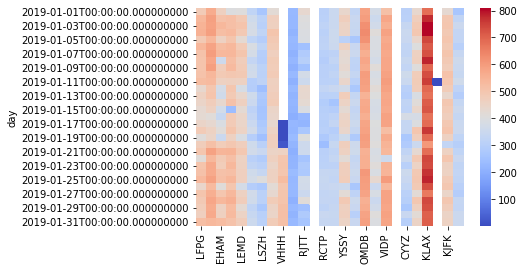

In [ ]:
sns.heatmap(data, cmap='coolwarm')

In [ ]:
chart = alt.Chart(
        data.reset_index()
            # prepare data for altair
            .melt("day", var_name="airport", value_name="count")
    )

In [ ]:
def full_chart(source, subset, subset_name):
        # We have many airports, only pick a subset
        chart = source.transform_filter(
            alt.FieldOneOfPredicate(field="airport", oneOf=subset)
        )

        # When we come close to a line, highlight it
        highlight = alt.selection(
            type="single", nearest=True, on="mouseover", fields=["airport"]
        )

        # The scatter plot
        points = (
            chart.mark_point()
                .encode(
                x="day",
                y=alt.Y("count", title="# of departing flights"),
                color=alt.Color("airport", legend=alt.Legend(title=subset_name)),
                # not too noisy please
                opacity=alt.value(0.5),
            )
                .add_selection(highlight)
        )

        # The trend plot
        lines = (
            chart.mark_line()
                .encode(
                x="day",
                y="count",
                color="airport",
                size=alt.condition(~highlight, alt.value(1), alt.value(3)),
            )
                # the cloud is a bit messy, draw a trend through it
                .transform_loess("day", "count", groupby=["airport"], bandwidth=0.2)
        )

        return lines + points

In [ ]:
# Concatenate several plots
result = alt.vconcat(
    *[
        full_chart(chart, airport_, subset_name).properties(width=600, height=150)
        for subset_name, airport_ in zip(
            [
                "European airports",
                "East-Asian airports",
                "Asian/Australian airports",
                "American airports",
            ],
            airports_subset,
        )
    ]
).resolve_scale(color="independent")

In [ ]:
result

alt.VConcatChart(...)